# Call ROH in more classical ways
Use a classical Method: Check for long stretches where there are is a lack of heterozygous calls

In [1]:
import allel
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
### Load the Data
ch = 20
h5_path_sard = "../../ancient-sardinia/output/h5/mod_reich_sardinia_ancients_mrg_dedup_3trm_anno.h5"
meta_path = "../../ancient-sardinia/output/meta/meta_final.csv"   # HDF 5

f = h5py.File(h5_path_sard, "r") # Load for Sanity Check. See below!
list(f.keys())
print(list(f["calldata"].keys()))
print(list(f["variants"].keys()))


meta_df = pd.read_csv(meta_path)
assert(len(meta_df)==np.shape(f["calldata/GT"])[1])  # Sanity Check
### Load the SNP Data (to merge in Map):

ch_ids = np.array(f["variants/CHROM"]) == str(ch)
print(f"Found {np.sum(ch_ids)} markers on Chr. {ch}")

['AD', 'GT']
['AA', 'AF', 'AFR_AF', 'ALT', 'AMR_AF', 'CHROM', 'EAS_AF', 'EUR_AF', 'ID', 'POS', 'REF', 'SAS_AF']
Found 30333 markers on Chr. 20


In [92]:
def detect_homo(f, ind, snp_id=[]):
    """Detect two males with long ROH"""
    g = f["calldata/GT"][ch_ids, ind, :]
    g = g[g[:,0]>-1]   # Only do the called Markers
    het = (g[:,0] != g[:,1])
    
    # Detect Stretches of 0s
    x1 = np.hstack([ [True], het, [True] ])  # padding
    d = np.diff(x1.astype(int))
    starts = np.where(d == -1)[0]
    ends = np.where(d == 1)[0]
    return starts, ends

def call_roh(f, ind, snp_id=[], min_len=50):
    """Return List of long ROH: Index1, Index"""
    print(f"Doing Ind: {ind}")
    starts, ends = detect_homo(f, ind, snp_id)
    lengths = ends - starts
    m = np.max(lengths)
    i = np.argmax(lengths)
    
    output = []
    
    if m > min_len:
        output = [[ind, m, starts[i]]]
    return output

In [93]:
#call_roh(f, 2998, min_len=500)
ls = []

for i in range(3000,3100):
    ls += call_roh(f, i, min_len=500)

Doing Ind: 3000
Doing Ind: 3001
Doing Ind: 3002
Doing Ind: 3003
Doing Ind: 3004
Doing Ind: 3005
Doing Ind: 3006
Doing Ind: 3007
Doing Ind: 3008
Doing Ind: 3009
Doing Ind: 3010
Doing Ind: 3011
Doing Ind: 3012
Doing Ind: 3013
Doing Ind: 3014
Doing Ind: 3015
Doing Ind: 3016
Doing Ind: 3017
Doing Ind: 3018
Doing Ind: 3019
Doing Ind: 3020
Doing Ind: 3021
Doing Ind: 3022
Doing Ind: 3023
Doing Ind: 3024
Doing Ind: 3025
Doing Ind: 3026
Doing Ind: 3027
Doing Ind: 3028
Doing Ind: 3029
Doing Ind: 3030
Doing Ind: 3031
Doing Ind: 3032
Doing Ind: 3033
Doing Ind: 3034
Doing Ind: 3035
Doing Ind: 3036
Doing Ind: 3037
Doing Ind: 3038
Doing Ind: 3039
Doing Ind: 3040
Doing Ind: 3041
Doing Ind: 3042
Doing Ind: 3043
Doing Ind: 3044
Doing Ind: 3045
Doing Ind: 3046
Doing Ind: 3047
Doing Ind: 3048
Doing Ind: 3049
Doing Ind: 3050
Doing Ind: 3051
Doing Ind: 3052
Doing Ind: 3053
Doing Ind: 3054
Doing Ind: 3055
Doing Ind: 3056
Doing Ind: 3057
Doing Ind: 3058
Doing Ind: 3059
Doing Ind: 3060
Doing Ind: 3061
Doing In

In [94]:
ls

[[3005, 689, 6418], [3043, 1013, 8178], [3050, 2478, 9190], [3099, 2268, 8581]]

Markers Called: 13698


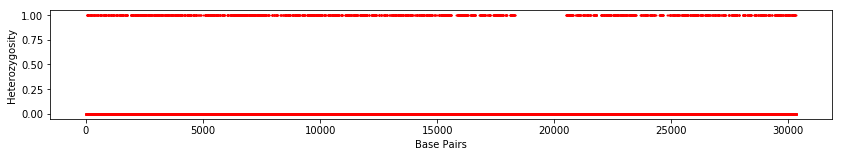

In [96]:
ind = 3043

no_call = f["calldata/GT"][ch_ids, ind, 0] > -1
print(f"Markers Called: {np.sum(no_call)}")

### Get Individual Genotype:
hets = (f["calldata/GT"][ch_ids, ind, 0] != f["calldata/GT"][ch_ids, ind, 1])


plt.figure(figsize=(14,2))
plt.xlabel("Base Pairs")
plt.ylabel("Heterozygosity")
plt.plot(hets, "ro", ms=1)
plt.show()

# Area 51

In [16]:
meta_df[meta_df["clst"]=="Cag"]

,iid,label,lat,lon,x_contam,mt_contam,age,study,clst_alt,period_alt,include_alt,clst,mean_cov,med_cov,n_cov_snp,full_iid
2997,csct_0,Cag,NaN,NaN,NaN,NaN,0.0,Chiang et al. 2016,Cag,NaN,1.0,Cag,NaN,NaN,NaN,csct_000052
2998,csct_0,Cag,NaN,NaN,NaN,NaN,0.0,Chiang et al. 2016,Cag,NaN,1.0,Cag,NaN,NaN,NaN,csct_000053
3000,csct_0,Cag,NaN,NaN,NaN,NaN,0.0,Chiang et al. 2016,Cag,NaN,1.0,Cag,NaN,NaN,NaN,csct_000058
3001,csct_0,Cag,NaN,NaN,NaN,NaN,0.0,Chiang et al. 2016,Cag,NaN,1.0,Cag,NaN,NaN,NaN,csct_000059
3085,csct_0,Cag,NaN,NaN,NaN,NaN,0.0,Chiang et al. 2016,Cag,NaN,1.0,Cag,NaN,NaN,NaN,csct_000229
3086,csct_0,Cag,NaN,NaN,NaN,NaN,0.0,Chiang et al. 2016,Cag,NaN,1.0,Cag,NaN,NaN,NaN,csct_000230
3162,csct_0,Cag,NaN,NaN,NaN,NaN,0.0,Chiang et al. 2016,Cag,NaN,1.0,Cag,NaN,NaN,NaN,csct_000409
3163,csct_0,Cag,NaN,NaN,NaN,NaN,0.0,Chiang et al. 2016,Cag,NaN,1.0,Cag,NaN,NaN,NaN,csct_000410
3164,csct_0,Cag,NaN,NaN,NaN,NaN,0.0,Chiang et al. 2016,Cag,NaN,1.0,Cag,NaN,NaN,NaN,csct_000412
3165,csct_0,Cag,NaN,NaN,NaN,NaN,0.0,Chiang et al. 2016,Cag,NaN,1.0,Cag,NaN,NaN,NaN,csct_000413


In [74]:
ch_ids

array([False, False, False, ..., False, False, False])